# Budget Analysis

---

## Environment Setup

In [1]:
# Initial Imports
import os
import plaid
import requests
import datetime
import json
import pandas as pd
from dotenv import load_dotenv
%matplotlib inline

In [2]:
# Helper functions

def pretty_print_response(response):
    """
    This function formats a JSON file to pretty printing it in the screen.
    """
    print(json.dumps(response, indent=4, sort_keys=True))

In [3]:
# Set environment variables from the .env file
load_dotenv()

True

In [8]:
# Extract API keys from environment variables
PLAID_CLIENT_ID = os.getenv("PLAID_CLIENT_ID")
PLAID_SECRET = os.getenv("PLAID_SBX_SECRET_KEY")
PLAID_ENV = os.getenv('PLAID_ENV', 'sandbox')
PLAID_PRODUCTS = os.getenv('PLAID_PRODUCTS', 'transactions')

---

## Plaid Access Token

In this section, you will use the `plaid-python` API to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:

1. Create a client to connect to plaid

2. Use the client to generate a public token and request the following items: ['transactions', 'income', 'assets']

3. Exchange the public token for an access token

4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [9]:
# Create the client object

from plaid import Client

client = Client(
    client_id=PLAID_CLIENT_ID,
    secret=PLAID_SECRET,
    environment='sandbox',
    api_version='2019-05-29'
)

In [10]:
# Set the institution id
INSTITUTION_ID = "ins_109508"

### 2. Generate a public token

In [17]:
# Create the public token

create_token_response = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income','assets'])

# Print the public token



### 3. Exchange the public token for an access token

In [20]:
# Retrieve the access token

exchange_response = client.Item.public_token.exchange(create_token_response['public_token'])

# Print the access token


In [21]:
# Store the access token in a Python variable

access_token = exchange_response['access_token']

### 4. Fetch Accounts

In [22]:
# Retrieve accounts

client.Accounts.get(access_token)

# Print accounts


{'accounts': [{'account_id': 'voXREG5aKGcwGa7xZp15uD3wm9xvXDFWZ6aGP',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': 'Rp31WmV7bmULnWr9EzKvFWm4DxNAzWtRop7xx',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': '6GlBRrmAKrTGMV8WvkbmuAlwPGWmxAIgPDjaj',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days

2. Print the categories for each transaction type

3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)

4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [23]:
# Set the start and end date 90 days from today

# Retrieve the transactions for the last 90 days

# Print the transactions

start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())

transaction_response = client.Transactions.get(access_token,start_date,end_date)
transactions = transaction_response['transactions']
pretty_print_response(transactions)


[
    {
        "account_id": "XAPwyX1LkXskaem9q4AztNJvzb894NudvKpM5",
        "account_owner": null,
        "amount": 500,
        "authorized_date": null,
        "category": [
            "Travel",
            "Airlines and Aviation Services"
        ],
        "category_id": "22001000",
        "date": "2020-07-29",
        "iso_currency_code": "USD",
        "location": {
            "address": null,
            "city": null,
            "country": null,
            "lat": null,
            "lon": null,
            "postal_code": null,
            "region": null,
            "store_number": null
        },
        "merchant_name": "United Airlines",
        "name": "United Airlines",
        "payment_channel": "in store",
        "payment_meta": {
            "by_order_of": null,
            "payee": null,
            "payer": null,
            "payment_method": null,
            "payment_processor": null,
            "ppd_id": null,
            "reason": null,
            "refer

### 2. Print the categories for each transaction

In [24]:
# Create a for-loop to print the categories for each transaction

for transaction in transactions:
    print(transaction["category"])

['Travel', 'Airlines and Aviation Services']
['Travel', 'Taxi']
['Food and Drink', 'Restaurants']
['Payment']
['Food and Drink', 'Restaurants', 'Fast Food']
['Shops', 'Sporting Goods']
['Payment', 'Credit Card']
['Travel', 'Taxi']
['Transfer', 'Debit']
['Transfer', 'Deposit']
['Recreation', 'Gyms and Fitness Centers']
['Travel', 'Airlines and Aviation Services']
['Food and Drink', 'Restaurants', 'Fast Food']
['Food and Drink', 'Restaurants', 'Coffee Shop']
['Food and Drink', 'Restaurants']
['Transfer', 'Credit']
['Travel', 'Airlines and Aviation Services']
['Travel', 'Taxi']
['Food and Drink', 'Restaurants']
['Payment']
['Food and Drink', 'Restaurants', 'Fast Food']
['Shops', 'Sporting Goods']
['Payment', 'Credit Card']
['Travel', 'Taxi']
['Transfer', 'Debit']
['Transfer', 'Deposit']
['Recreation', 'Gyms and Fitness Centers']
['Travel', 'Airlines and Aviation Services']
['Food and Drink', 'Restaurants', 'Fast Food']
['Food and Drink', 'Restaurants', 'Coffee Shop']
['Food and Drink', 'R

### 3. Create a new DataFrame using the following fields from the JSON transaction data: `date`, `name`, `amount`, `category`. 

(For categories with more than one label, just use the first category label in the list)

In [25]:
# Define an empty DataFrame and set the columns as date, name, amount, and category

# Retrieve all the transactions

# Populate the transactions DataFrame with the transactions data

# Display sample data from the DataFrame    

transactions_df = pd.DataFrame(columns=["Date", "Name", "Amount", "Category"])
dates, names, amounts, cats = [],[],[],[]
for transaction in transactions:
    dates.append(transaction["date"])
    names.append(transaction["name"])
    amounts.append(float(transaction["amount"]))
    cats.append(transaction["category"][0])
transactions_df["Date"] = dates
transactions_df["Name"] = names
transactions_df["Amount"] = amounts
transactions_df["Category"] = cats
transactions_df.tail()

,Date,Name,Amount,Category
43,2020-05-13,United Airlines,-500.00,Travel
44,2020-05-12,McDonald's,12.00,Food and Drink
45,2020-05-12,Starbucks,4.33,Food and Drink
46,2020-05-11,SparkFun,89.40,Food and Drink
47,2020-05-10,INTRST PYMNT,-4.22,Transfer


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [26]:
# Display data types

transactions_df.set_index(pd.DatetimeIndex(transactions_df['Date']), inplace = True)
transactions_df.head()
transactions_df.drop(columns = ['Date'], inplace = True)
transactions_df.tail()

,Name,Amount,Category
Date,,,
2020-05-13,United Airlines,-500.00,Travel
2020-05-12,McDonald's,12.00,Food and Drink
2020-05-12,Starbucks,4.33,Food and Drink
2020-05-11,SparkFun,89.40,Food and Drink
2020-05-10,INTRST PYMNT,-4.22,Transfer


---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:

1. Determine the previous year's gross income and print the results

2. Determine the current monthly income and print the results

3. Determine the projected yearly income and print the results

In [28]:
# Fetch the income data

income_response = client.Income.get(access_token)

# Print the income data

print(income_response['income'])


{'income_streams': [{'confidence': 0.99, 'days': 690, 'monthly_income': 500, 'name': 'UNITED AIRLINES'}], 'last_year_income': 6000, 'last_year_income_before_tax': 7285, 'max_number_of_overlapping_income_streams': 1, 'number_of_income_streams': 1, 'projected_yearly_income': 6085, 'projected_yearly_income_before_tax': 7389}


In [29]:
# Determine the previous year's gross income and print the results

last_year_gross_income = income_response["income"]["last_year_income_before_tax"]
print(f"Last years gross income was: ${last_year_gross_income}")


Last years gross income was: $7285


In [30]:
# Determine the current monthly income and print the results

monthly_income = income_response["income"]["income_streams"][0]["monthly_income"]
print(f"Monthly income is: ${monthly_income}")

Monthly income is: $500


In [31]:
# Determine the projected yearly income and print the results

projected_yearly_income = income_response["income"]["projected_yearly_income"]
print(f"Projected yearly income is: ${projected_yearly_income}")

Projected yearly income is: $6085


---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)

2. Generate a bar chart with the number of transactions for each category

3. Calulate the expenses per month

4. Plot the total expenses per month

### Calculate the expenses per category

In [32]:
# Compute the total expenses per category

# Display the expenses per category

expenses_by_cat = transactions_df.groupby('Category').sum()
expenses_by_cat

,Amount
Category,
Food and Drink,3317.19
Payment,6310.50
Recreation,235.50
Shops,1500.00
Transfer,20537.34
Travel,35.19


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f84dcb55790>],
      dtype=object)

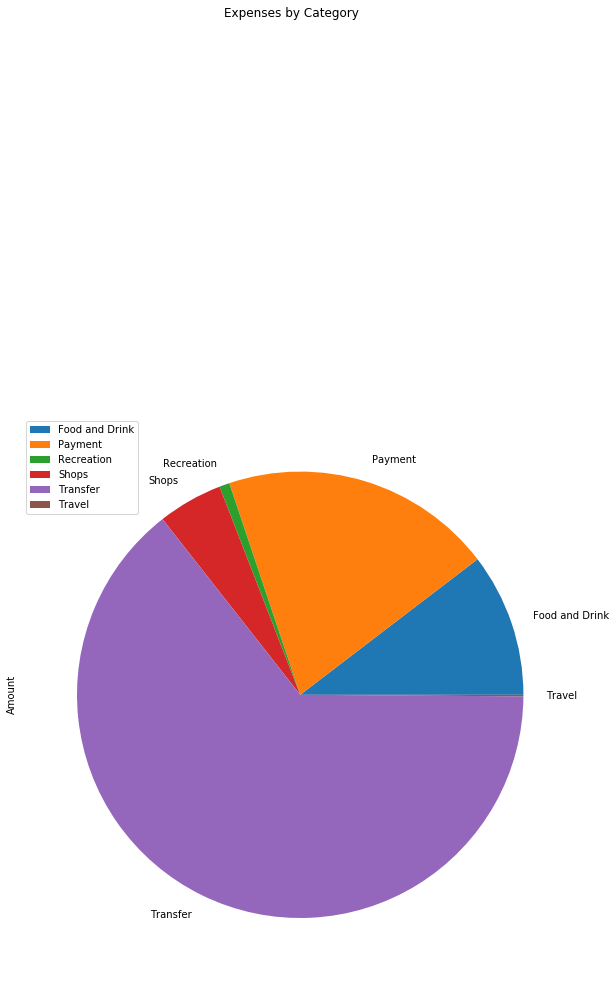

In [33]:
# Create a spending categories pie chart.

expenses_by_cat.plot(kind = "pie", subplots = True, title = "Expenses by Category", figsize = (10,20))

### Calculate the expenses per month

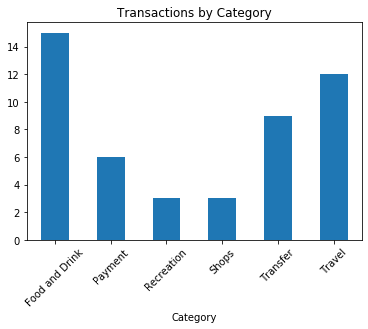

In [36]:
# Create a DataFrame with the total expenses

# Display sample data

transactions_by_month = transactions_df.groupby('Category').count()
transactions_by_month['Amount'].plot(kind='bar', title = "Transactions by Category", rot = 45)


In [37]:
# Create a spending per month bar chart


transactions_per_month = transactions_df.groupby(transactions_df.index.month).sum()
transactions_per_month

,Amount
Date,
5,10645.24
6,10645.24
7,10645.24


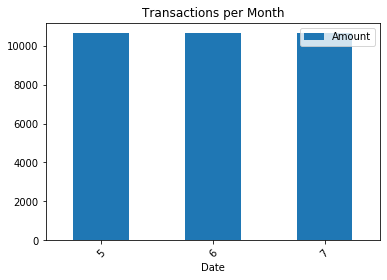

In [38]:
transactions_per_month.plot(kind = 'bar', title = "Transactions per Month", rot=45)